In [3]:
import os
import sys

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

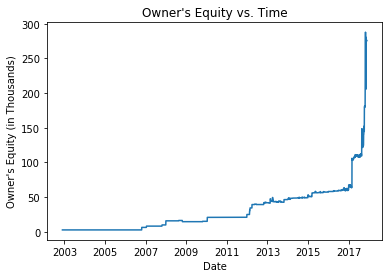

In [6]:
import datetime

from portfolio_creator.data_source import DataSource
from portfolio_creator.portfolio_creator import PortfolioCreator
from pylab import plot, xlabel, ylabel, title, show
from utilities.constants import Constants
from utilities.epoch_timestamp_converter import EpochTimestampConverter

portfolio = PortfolioCreator().create(DataSource())
number_of_days = Constants.DAYS_PER_YEAR * 15

times = []
owners_equity = []

for day in range(0, number_of_days):
    historical_time = EpochTimestampConverter().epoch() - day * Constants.SECONDS_PER_DAY
    formatted_date = EpochTimestampConverter().timestamp(historical_time)
    times.append(datetime.datetime.fromtimestamp(historical_time))
    owners_equity.append(portfolio.total_value(formatted_date)/1000)

plot(times, owners_equity)
xlabel('Date')
ylabel("Owner's Equity (in Thousands)")
title("Owner's Equity vs. Time")
show()